# Analysing Episode Descriptions

In [2]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
df = pd.read_csv('top_podcasts.csv',index_col=0)
df

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_name
771,6ResySMJy2R7s5snDpcAsu,5,2020-07-16,1224: What To Do When Stocks Go Down by The Fi...,The Finance Twins share what to do when stocks...,https://p.scdn.co/mp3-preview/e7b343590d7edb8a...,Optimal Finance Daily
772,6tOw9tt6czdKcflYo36EPp,7,2020-07-15,1223: [Part 2] Why Good People Need To Get Com...,Margo Aaron of That Seems Important shares why...,https://p.scdn.co/mp3-preview/375b536286583858...,Optimal Finance Daily
773,2teuj9mEBhDbFhvOly8R1b,6,2020-07-14,1222: [Part 1] Why Good People Need To Get Com...,Margo Aaron of That Seems Important shares why...,https://p.scdn.co/mp3-preview/670b84b7d04fb09b...,Optimal Finance Daily
774,4XyEGuRl8ysmOsAnAGGVxY,6,2020-07-13,1221: Seven Crucial Money Rules I Broke and Re...,Claire of Want Less shares seven crucial money...,https://p.scdn.co/mp3-preview/f3ed358bb15dc7f6...,Optimal Finance Daily
775,5oYurjCI9sWNrh19CQREBI,6,2020-07-12,1220: Don't Ignore the Hidden Cost of Your Stu...,Dawn Starks of SimpleMoney shares why you shou...,https://p.scdn.co/mp3-preview/35fe89a7171fc267...,Optimal Finance Daily
...,...,...,...,...,...,...,...
2904,5WmcYCjiBjzjEbuk4rW5cZ,65,2013-07-27,RPF 0006 – How to Afford Anything You Want in ...,"Today’s show is an interview with Paula Pant, ...",https://p.scdn.co/mp3-preview/5a142d03b67a1cec...,Radical Personal Finance
2905,0IKEmFa48F88iFtGgHH3Na,129,2013-07-19,RPF 0004 – How to Save Huge Money on Your Cell...,Today’s show is a comprehensive guide that wil...,https://p.scdn.co/mp3-preview/51423c84a9ac0b23...,Radical Personal Finance
2906,3zqeIQy1kbXS7mtGgYfEO6,81,2013-07-18,RPF 0003 – Book Review and Commentary on “Earl...,In this episode of the Radical Personal Financ...,https://p.scdn.co/mp3-preview/ddaf2aac5b67291d...,Radical Personal Finance
2907,6dKrtTth7OE2DwfPOtTn0I,25,2013-07-16,RPF 0002 – The first question in financial pla...,Where do you start when thinking about financi...,https://p.scdn.co/mp3-preview/fb409ff56e39cc20...,Radical Personal Finance


In [4]:
df.isnull().any()

ep_id                   False
ep_duration             False
ep_release_date         False
ep_name                 False
ep_description           True
ep_audio_preview_url    False
show_name               False
dtype: bool

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().any()

ep_id                   False
ep_duration             False
ep_release_date         False
ep_name                 False
ep_description          False
ep_audio_preview_url    False
show_name               False
dtype: bool

In [7]:
search_values = ['bitcoin', 'cryptocurrency']

df_a = df[df.ep_description.str.contains('|'.join(search_values ))]
df_a

,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_name
1025,5PQHT8O3Pp0elPNCsJ54EU,8,2019-11-05,970: Is Bitcoin a Safe Retirement Strategy? by...,Geoffrey Bourne with Money Mini Blog shares if...,https://p.scdn.co/mp3-preview/73a8e598d5f27d2d...,Optimal Finance Daily
1140,6M4HQdj9cgGocaFDXN66YA,11,2019-06-07,855: Bitcoin - Millennials Fake Gold by Vitali...,Vitaliy Katsenelson of Contrarian Edge shares ...,https://p.scdn.co/mp3-preview/41e446bec57f0348...,Optimal Finance Daily
1274,6JKqjK8MYg8flRranVVTI5,8,2018-12-03,721: Cryptocurrencies Are Just Beanie Babies b...,Vitaliy Katsenelson of Contrarian Edge shares ...,https://p.scdn.co/mp3-preview/e6b51ac46d4fb193...,Optimal Finance Daily
1498,2tBFz5NEN2KGU6NWany13o,10,2018-01-23,497: Why Bitcoin is Stupid - 2 by Mr. Money Mu...,Mr. Money Mustache shares his opinion about Bi...,https://p.scdn.co/mp3-preview/0bca9efb64ea7700...,Optimal Finance Daily
1499,5arXIEvwFJB24Nr5cl9WVx,9,2018-01-22,496: Why Bitcoin is Stupid - Part 1 by Mr. Mon...,Mr. Money Mustache shares his opinion about Bi...,https://p.scdn.co/mp3-preview/81afa527e31056fa...,Optimal Finance Daily
1515,1iwcbaIzmzSPxUjshlYf87,8,2017-12-29,480: How to Invest in Speculative Investments ...,Sam of Financial Samurai shares how to invest ...,https://p.scdn.co/mp3-preview/4ed05e66aea15409...,Optimal Finance Daily
1516,5Pyg5vlIMy75cph8kBv2il,9,2017-12-28,479: How to Invest in Speculative Investments ...,Sam of Financial Samurai shares how to invest ...,https://p.scdn.co/mp3-preview/8acd4f8b4494a397...,Optimal Finance Daily
1563,2vbYO5fmFmhm3hsI0ZjeIF,10,2017-10-24,432: What Is Bitcoin And Bitcoin and Cryptocur...,Hear 2 posts from Kalen Bruce of Money Mini Bl...,https://p.scdn.co/mp3-preview/2a64cb1b065405b5...,Optimal Finance Daily
13035,5Cqy11LOJRinXKerWoc4Yx,35,2020-02-13,2.13.20 Insurance companies are ripping teache...,"Teachers, non-profit workers and some hospital...",https://p.scdn.co/mp3-preview/4bf7b086a01a81b9...,The Clark Howard Podcast
13207,3H2uCyuehOuHEUVIp5abFq,36,2019-06-19,6.19.19 Facebook's new cryptocurrenty - Libra;...,Clark discusses what the new Facebook backed c...,https://p.scdn.co/mp3-preview/cff5c785bd94ab92...,The Clark Howard Podcast


In [70]:
df_a['show_name'].value_counts() #how many episodes of each show have thes terms in their descriptions?

Optimal Finance Daily       8
The Clark Howard Podcast    3
Radical Personal Finance    2
Name: show_name, dtype: int64

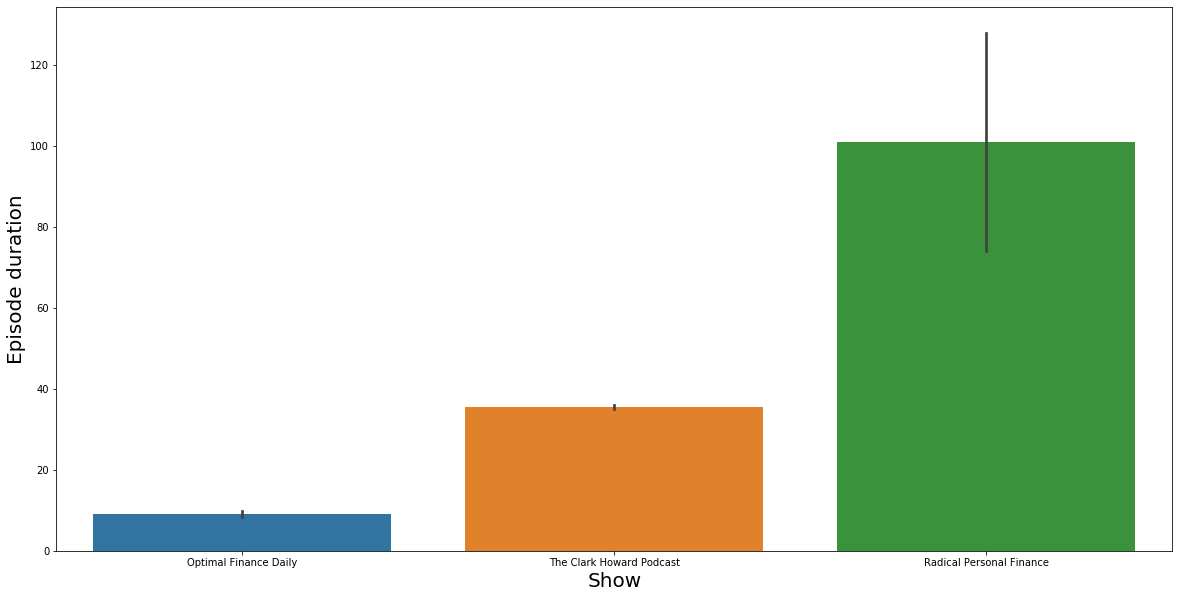

In [14]:
plt.figure(figsize=(20,10))
sns.barplot(df_a['show_name'],df_a['ep_duration'])
plt.xlabel('Show',fontsize=20)
plt.ylabel('Episode duration',fontsize=20)
plt.savefig('crypto_ep.png');

In [8]:
df_a['tokenized'] = df_a['ep_description'].apply(word_tokenize)
df_a

/Users/sukanto/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ep_id,ep_duration,ep_release_date,ep_name,ep_description,ep_audio_preview_url,show_name,tokenized
1025,5PQHT8O3Pp0elPNCsJ54EU,8,2019-11-05,970: Is Bitcoin a Safe Retirement Strategy? by...,Geoffrey Bourne with Money Mini Blog shares if...,https://p.scdn.co/mp3-preview/73a8e598d5f27d2d...,Optimal Finance Daily,"[Geoffrey, Bourne, with, Money, Mini, Blog, sh..."
1140,6M4HQdj9cgGocaFDXN66YA,11,2019-06-07,855: Bitcoin - Millennials Fake Gold by Vitali...,Vitaliy Katsenelson of Contrarian Edge shares ...,https://p.scdn.co/mp3-preview/41e446bec57f0348...,Optimal Finance Daily,"[Vitaliy, Katsenelson, of, Contrarian, Edge, s..."
1274,6JKqjK8MYg8flRranVVTI5,8,2018-12-03,721: Cryptocurrencies Are Just Beanie Babies b...,Vitaliy Katsenelson of Contrarian Edge shares ...,https://p.scdn.co/mp3-preview/e6b51ac46d4fb193...,Optimal Finance Daily,"[Vitaliy, Katsenelson, of, Contrarian, Edge, s..."
1498,2tBFz5NEN2KGU6NWany13o,10,2018-01-23,497: Why Bitcoin is Stupid - 2 by Mr. Money Mu...,Mr. Money Mustache shares his opinion about Bi...,https://p.scdn.co/mp3-preview/0bca9efb64ea7700...,Optimal Finance Daily,"[Mr., Money, Mustache, shares, his, opinion, a..."
1499,5arXIEvwFJB24Nr5cl9WVx,9,2018-01-22,496: Why Bitcoin is Stupid - Part 1 by Mr. Mon...,Mr. Money Mustache shares his opinion about Bi...,https://p.scdn.co/mp3-preview/81afa527e31056fa...,Optimal Finance Daily,"[Mr., Money, Mustache, shares, his, opinion, a..."
1515,1iwcbaIzmzSPxUjshlYf87,8,2017-12-29,480: How to Invest in Speculative Investments ...,Sam of Financial Samurai shares how to invest ...,https://p.scdn.co/mp3-preview/4ed05e66aea15409...,Optimal Finance Daily,"[Sam, of, Financial, Samurai, shares, how, to,..."
1516,5Pyg5vlIMy75cph8kBv2il,9,2017-12-28,479: How to Invest in Speculative Investments ...,Sam of Financial Samurai shares how to invest ...,https://p.scdn.co/mp3-preview/8acd4f8b4494a397...,Optimal Finance Daily,"[Sam, of, Financial, Samurai, shares, how, to,..."
1563,2vbYO5fmFmhm3hsI0ZjeIF,10,2017-10-24,432: What Is Bitcoin And Bitcoin and Cryptocur...,Hear 2 posts from Kalen Bruce of Money Mini Bl...,https://p.scdn.co/mp3-preview/2a64cb1b065405b5...,Optimal Finance Daily,"[Hear, 2, posts, from, Kalen, Bruce, of, Money..."
13035,5Cqy11LOJRinXKerWoc4Yx,35,2020-02-13,2.13.20 Insurance companies are ripping teache...,"Teachers, non-profit workers and some hospital...",https://p.scdn.co/mp3-preview/4bf7b086a01a81b9...,The Clark Howard Podcast,"[Teachers, ,, non-profit, workers, and, some, ..."
13207,3H2uCyuehOuHEUVIp5abFq,36,2019-06-19,6.19.19 Facebook's new cryptocurrenty - Libra;...,Clark discusses what the new Facebook backed c...,https://p.scdn.co/mp3-preview/cff5c785bd94ab92...,The Clark Howard Podcast,"[Clark, discusses, what, the, new, Facebook, b..."


In [3]:
ep_descr = df.reset_index(drop=True)

text = df['ep_description'].str.lower()
text = text.str.replace('\d+', '')
text = text.astype('str')
text

771     the finance twins share what to do when stocks...
772     margo aaron of that seems important shares why...
773     margo aaron of that seems important shares why...
774     claire of want less shares seven crucial money...
775     dawn starks of simplemoney shares why you shou...
                              ...                        
2904    today’s show is an interview with paula pant, ...
2905    today’s show is a comprehensive guide that wil...
2906    in this episode of the radical personal financ...
2907    where do you start when thinking about financi...
2908    a brief introduction to the radical personal f...
Name: ep_description, Length: 2927, dtype: object

In [12]:
filtered_ep = {k:v for k,v in text.items() if 'bitcoin' in v}
filtered_ep

{1025: "geoffrey bourne with money mini blog shares if bitcoin is a safe retirement strategy. episode : is bitcoin a safe retirement strategy? by geoffrey bourne with money mini blog on alternative investments kalen bruce is the founder of moneyminiblog. his story is simple… he and his wife were $, in debt and became a student of finances to get out. they are now debt-free and building wealth. kalen shares everything he has learned on his blog, writing informative, entertaining, mini blogs to help you with your finances. finances can be intimidating, so he keeps his posts short, sweet, and simple. the original post is located here: http://moneyminiblog.com/investing/bitcoin-retirement/ please rate & review the show! visit me online at oldpodcast.com & in the o.l.d. podcasts facebook group! and join the ol' family to get your free gifts fundrise is the future of real estate investing. visit fundrise.com/ofd to have your first  months of fees waived.  ---   support this podcast: https://

In [64]:
df.isnull().any()

ep_id                   False
ep_duration             False
ep_release_date         False
ep_name                 False
ep_description           True
ep_audio_preview_url    False
show_name               False
dtype: bool

In [24]:
descr = pd.DataFrame(filtered_ep.items())
descr

,0,1
0,1025,geoffrey bourne with money mini blog shares if...
1,1140,vitaliy katsenelson of contrarian edge shares ...
2,1274,vitaliy katsenelson of contrarian edge shares ...
3,1498,mr. money mustache shares his opinion about bi...
4,1499,mr. money mustache shares his opinion about bi...
5,1515,sam of financial samurai shares how to invest ...
6,1516,sam of financial samurai shares how to invest ...
7,1563,hear posts from kalen bruce of money mini blo...
8,13354,black friday is over and cyber monday is here....
9,13442,topics: home improvements that will lowers you...


In [35]:
descr.drop([0],axis=1,inplace=True)

In [39]:
descr

,1
0,geoffrey bourne with money mini blog shares if...
1,vitaliy katsenelson of contrarian edge shares ...
2,vitaliy katsenelson of contrarian edge shares ...
3,mr. money mustache shares his opinion about bi...
4,mr. money mustache shares his opinion about bi...
5,sam of financial samurai shares how to invest ...
6,sam of financial samurai shares how to invest ...
7,hear posts from kalen bruce of money mini blo...
8,black friday is over and cyber monday is here....
9,topics: home improvements that will lowers you...


In [49]:
descr.shape

(17, 1)

In [58]:
descr.to_csv('descr.csv')

In [ ]:
df_text = pd.read_csv('descr.csv',enc) 

In [53]:
filtered_ep = {'filtered_ep':filtered_ep}

with open('filtered_ep.txt', 'w' ) as file:
    file.write(json.dumps(filtered_ep))